In [2]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import imblearn
from imblearn.over_sampling import SMOTE

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance as plot_importance_xgb
from lightgbm import LGBMClassifier, plot_importance as plot_importance_lgbm

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Data Connection & Understanding

#### Loading Dataset

In [3]:
df = pd.read_csv(r"D:\MindX\Kì 3 ( Data Analyst )\Lesson 14 - 15 - Final Test & Final Project\Final Project\data\netflix_customer_churn.csv")

#### Describing Dataset

In [4]:
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [6]:
df.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,0.503000,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,0.500041,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,0.000000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,1.000000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,1.000000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,1.000000,5.000000,98.420000


In [7]:
df.shape

(5000, 14)

### Data Preprocessing

#### Data Cleaning

In [8]:
df.drop(['customer_id'], axis=1, inplace=True)

In [9]:
df.isnull().sum()

age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

### EDA (Exploratory Data Analysis)

C:\Users\tanh4\AppData\Local\Temp\ipykernel_3992\1201052731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="churned", data=df, palette="Set2", ax=ax[0])


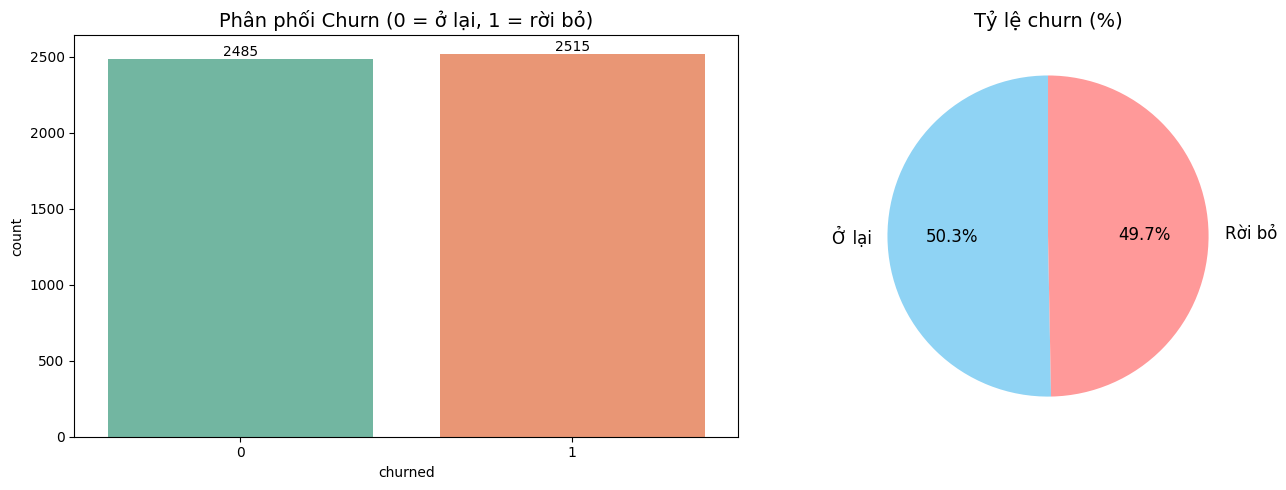

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Countplot churn
sns.countplot(x="churned", data=df, palette="Set2", ax=ax[0])
ax[0].set_title("Phân phối Churn (0 = ở lại, 1 = rời bỏ)", fontsize=14)
for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%d', fontsize=10)

# Pie chart churn theo tỷ lệ %
churn_counts = df["churned"].value_counts()
ax[1].pie(churn_counts, labels=["Ở lại", "Rời bỏ"], autopct='%1.1f%%',
          startangle=90, colors=["#8fd3f4", "#ff9999"], textprops={'fontsize': 12})
ax[1].set_title("Tỷ lệ churn (%)", fontsize=14)

plt.tight_layout()
plt.show()

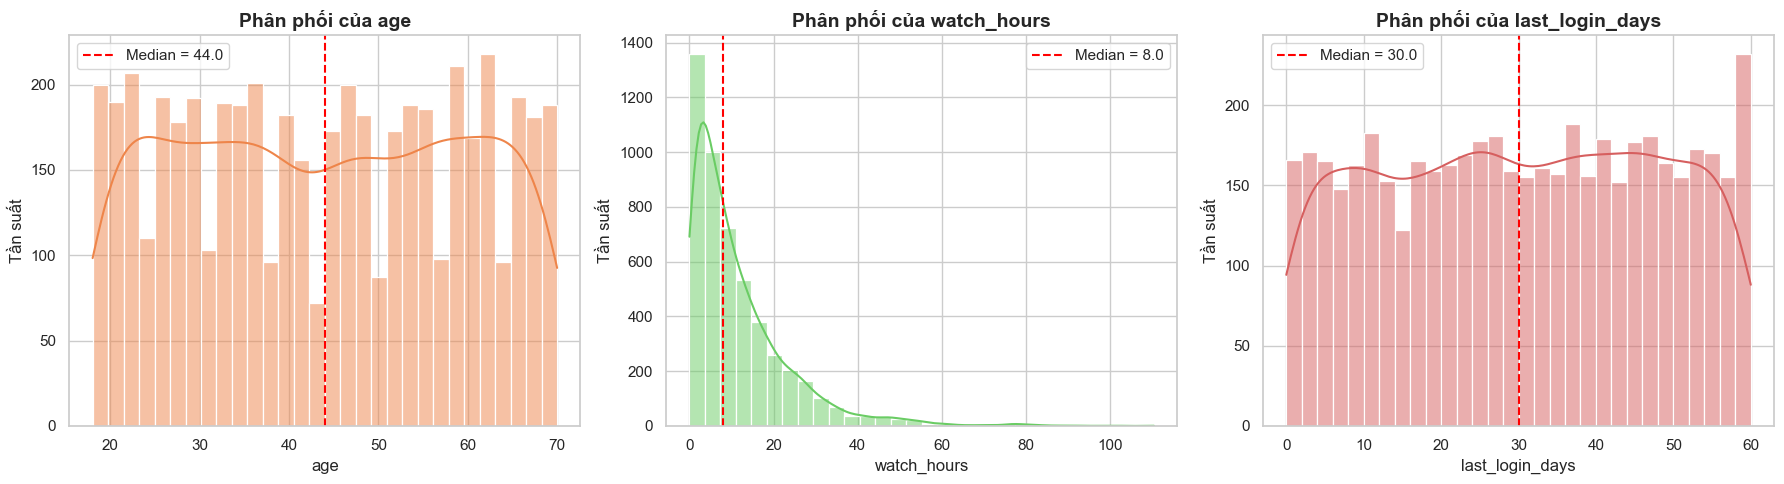

In [12]:
sns.set_theme(style="whitegrid", palette="muted")

cols_to_plot = ["age", "watch_hours", "last_login_days"]

plt.figure(figsize=(18, 5))

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color=sns.color_palette("muted")[i])
    plt.title(f"Phân phối của {col}", fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Tần suất", fontsize=12)
    # Thêm đường trung vị
    median_val = df[col].median()
    plt.axvline(median_val, color='red', linestyle='--', label=f'Median = {median_val:.1f}')
    plt.legend()

plt.tight_layout()
plt.show()

C:\Users\tanh4\AppData\Local\Temp\ipykernel_3992\433172826.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="monthly_fee", data=df, ax=axes[0], palette="viridis")
C:\Users\tanh4\AppData\Local\Temp\ipykernel_3992\433172826.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="number_of_profiles", data=df, ax=axes[1], palette="viridis")
C:\Users\tanh4\AppData\Local\Temp\ipykernel_3992\433172826.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=watch_time_counts.index.astype(str),


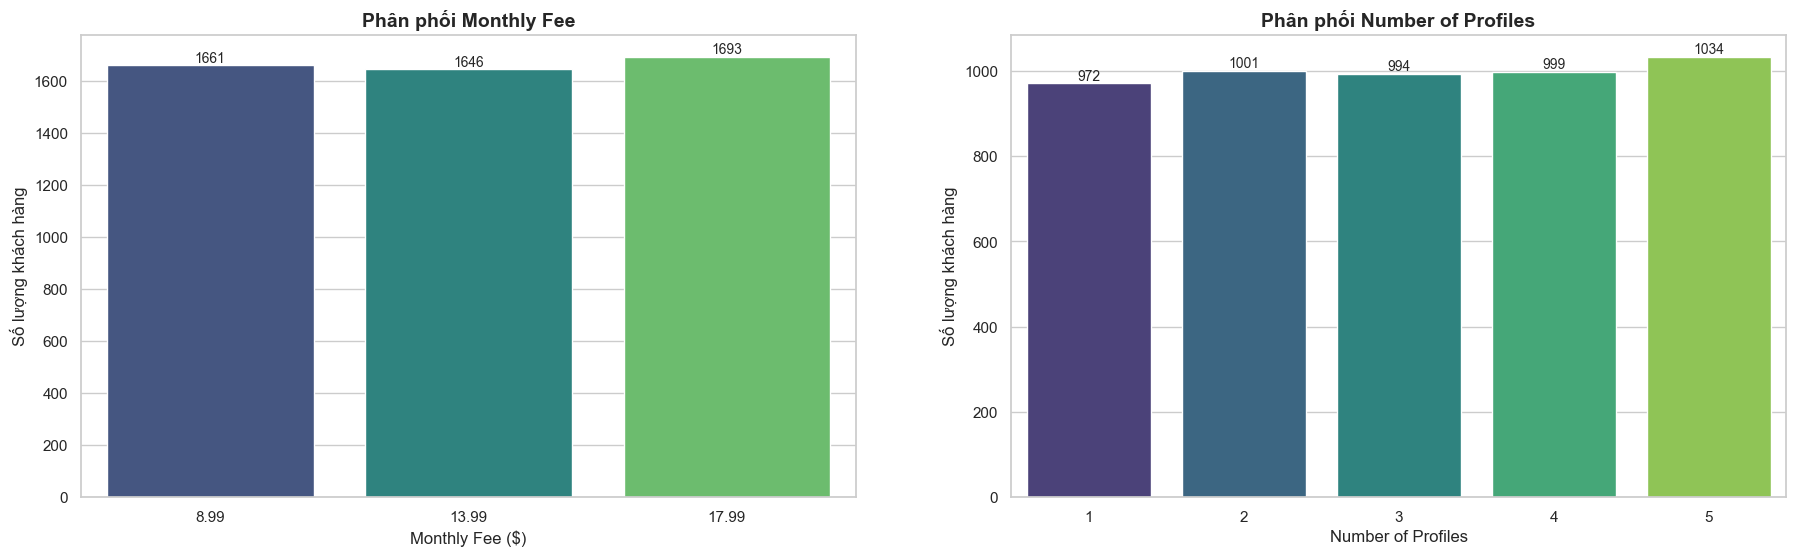

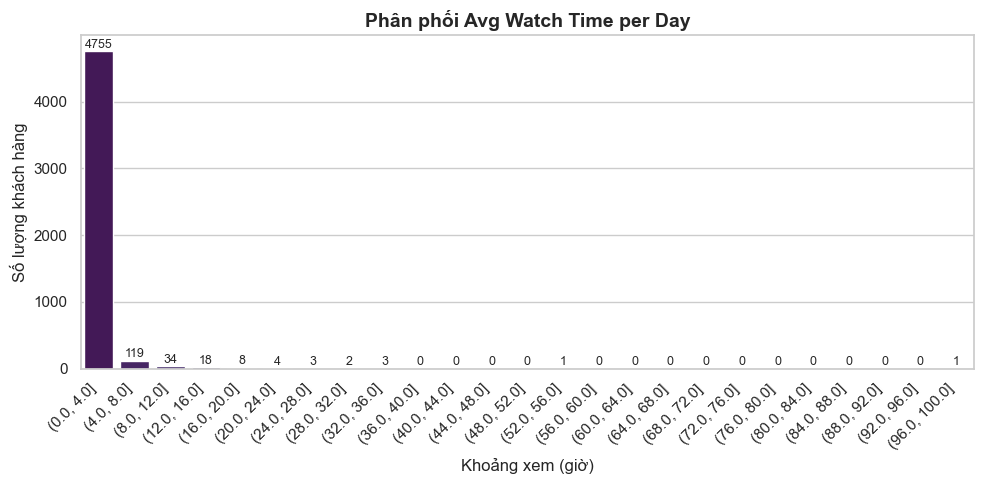

In [13]:
sns.set_theme(style="whitegrid", palette="viridis")

fig, axes = plt.subplots(1, 2, figsize=(22, 6))

# 1. monthly_fee
sns.countplot(x="monthly_fee", data=df, ax=axes[0], palette="viridis")
axes[0].set_title("Phân phối Monthly Fee", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Monthly Fee ($)")
axes[0].set_ylabel("Số lượng khách hàng")
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)

# 2. number_of_profiles
sns.countplot(x="number_of_profiles", data=df, ax=axes[1], palette="viridis")
axes[1].set_title("Phân phối Number of Profiles", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Number of Profiles")
axes[1].set_ylabel("Số lượng khách hàng")
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)

# 3. avg_watch_time_per_day -> tạo bins
bins = np.arange(0, df['avg_watch_time_per_day'].max() + 4, 4)
df['watch_time_bin'] = pd.cut(df['avg_watch_time_per_day'], bins=bins)

watch_time_counts = df['watch_time_bin'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(x=watch_time_counts.index.astype(str),
            y=watch_time_counts.values,
            palette="viridis")
plt.title("Phân phối Avg Watch Time per Day", fontsize=14, fontweight="bold")
plt.xlabel("Khoảng xem (giờ)")
plt.ylabel("Số lượng khách hàng")
plt.xticks(rotation=45, ha="right")

# Hiển thị số lượng trên cột
for i, v in enumerate(watch_time_counts.values):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

C:\Users\tanh4\AppData\Local\Temp\ipykernel_3992\1669116579.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette="deep")


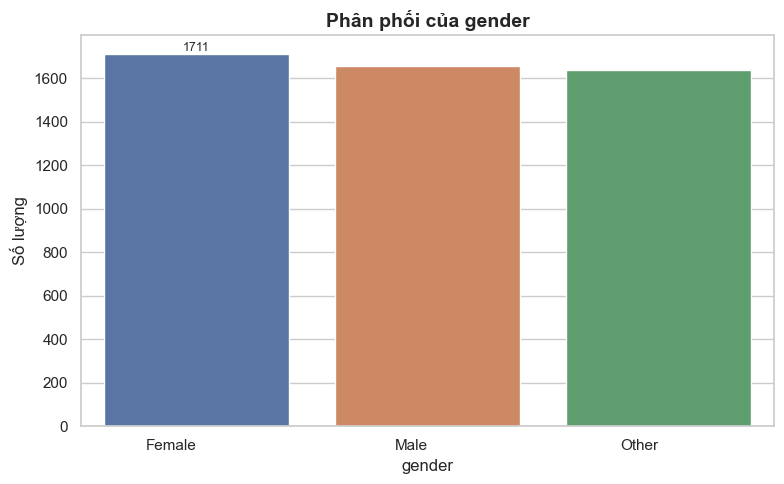

C:\Users\tanh4\AppData\Local\Temp\ipykernel_3992\1669116579.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette="deep")


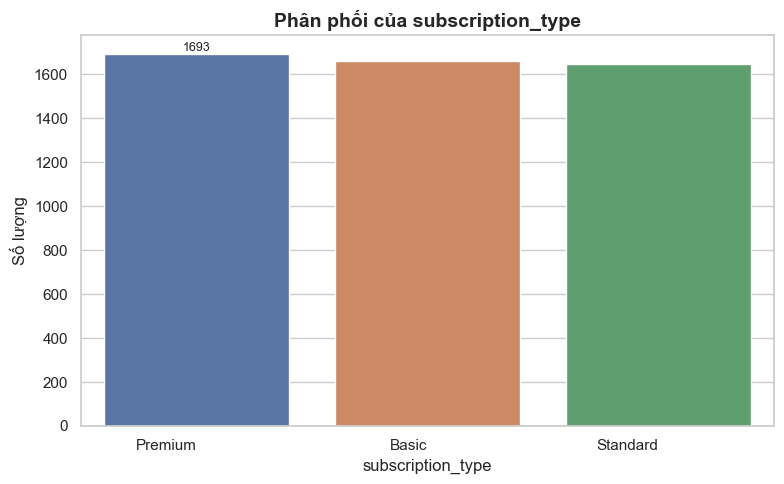

C:\Users\tanh4\AppData\Local\Temp\ipykernel_3992\1669116579.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette="deep")


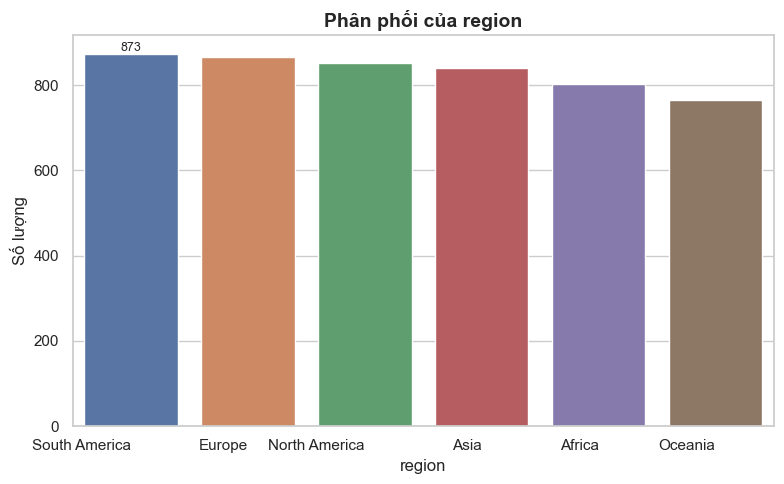

C:\Users\tanh4\AppData\Local\Temp\ipykernel_3992\1669116579.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette="deep")


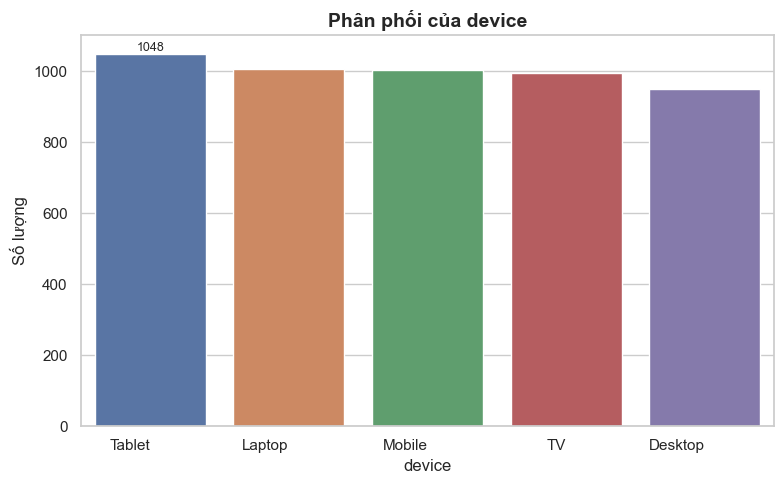

C:\Users\tanh4\AppData\Local\Temp\ipykernel_3992\1669116579.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette="deep")


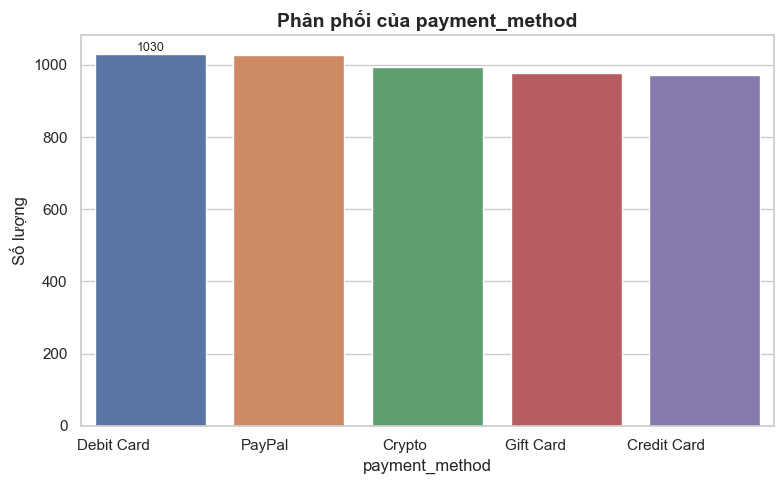

C:\Users\tanh4\AppData\Local\Temp\ipykernel_3992\1669116579.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette="deep")


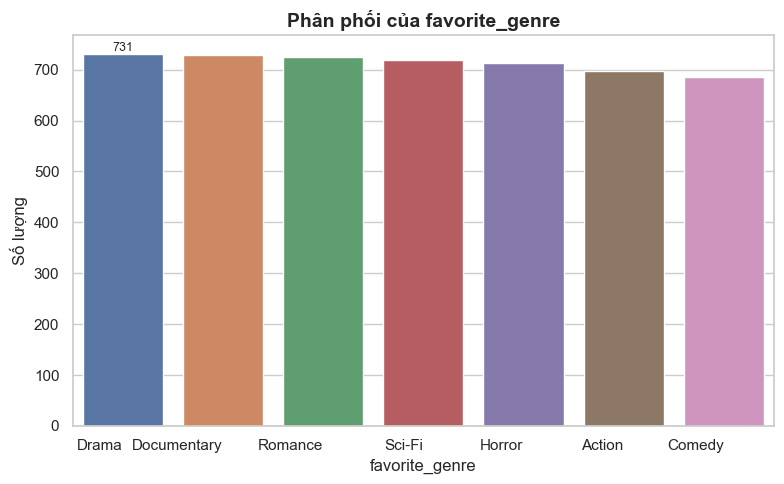

In [14]:
categorical_cols = ["gender", "subscription_type", "region", "device", "payment_method", "favorite_genre"]
sns.set_theme(style="whitegrid")

# Vẽ lần lượt từng biến
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    counts = df[col].value_counts()
    ax = sns.barplot(x=counts.index, y=counts.values, palette="deep")
    ax.set_title(f"Phân phối của {col}", fontsize=14, fontweight="bold")
    ax.set_ylabel("Số lượng")
    ax.set_xlabel(col)
    ax.bar_label(ax.containers[0], fontsize=9)
    plt.xticks( ha="right")
    plt.tight_layout()
    plt.show()

C:\Users\tanh4\AppData\Local\Temp\ipykernel_3992\3891170756.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn = df.groupby('age_group')['churned'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()


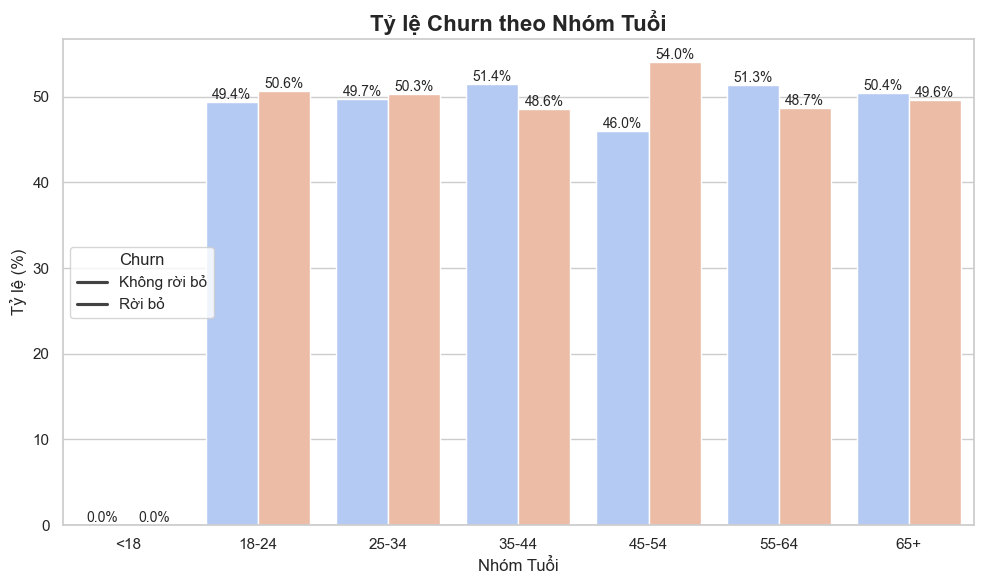

In [15]:
# Chia nhóm tuổi (bins)
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Tính tỷ lệ churn theo nhóm tuổi
age_churn = df.groupby('age_group')['churned'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(data=age_churn, x='age_group', y='percentage', hue='churned', palette='coolwarm')

# Thêm nhãn phần trăm trên cột
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10)

plt.title("Tỷ lệ Churn theo Nhóm Tuổi", fontsize=16, weight='bold')
plt.xlabel("Nhóm Tuổi")
plt.ylabel("Tỷ lệ (%)")
plt.legend(title="Churn", labels=["Không rời bỏ", "Rời bỏ"])
plt.tight_layout()
plt.show()

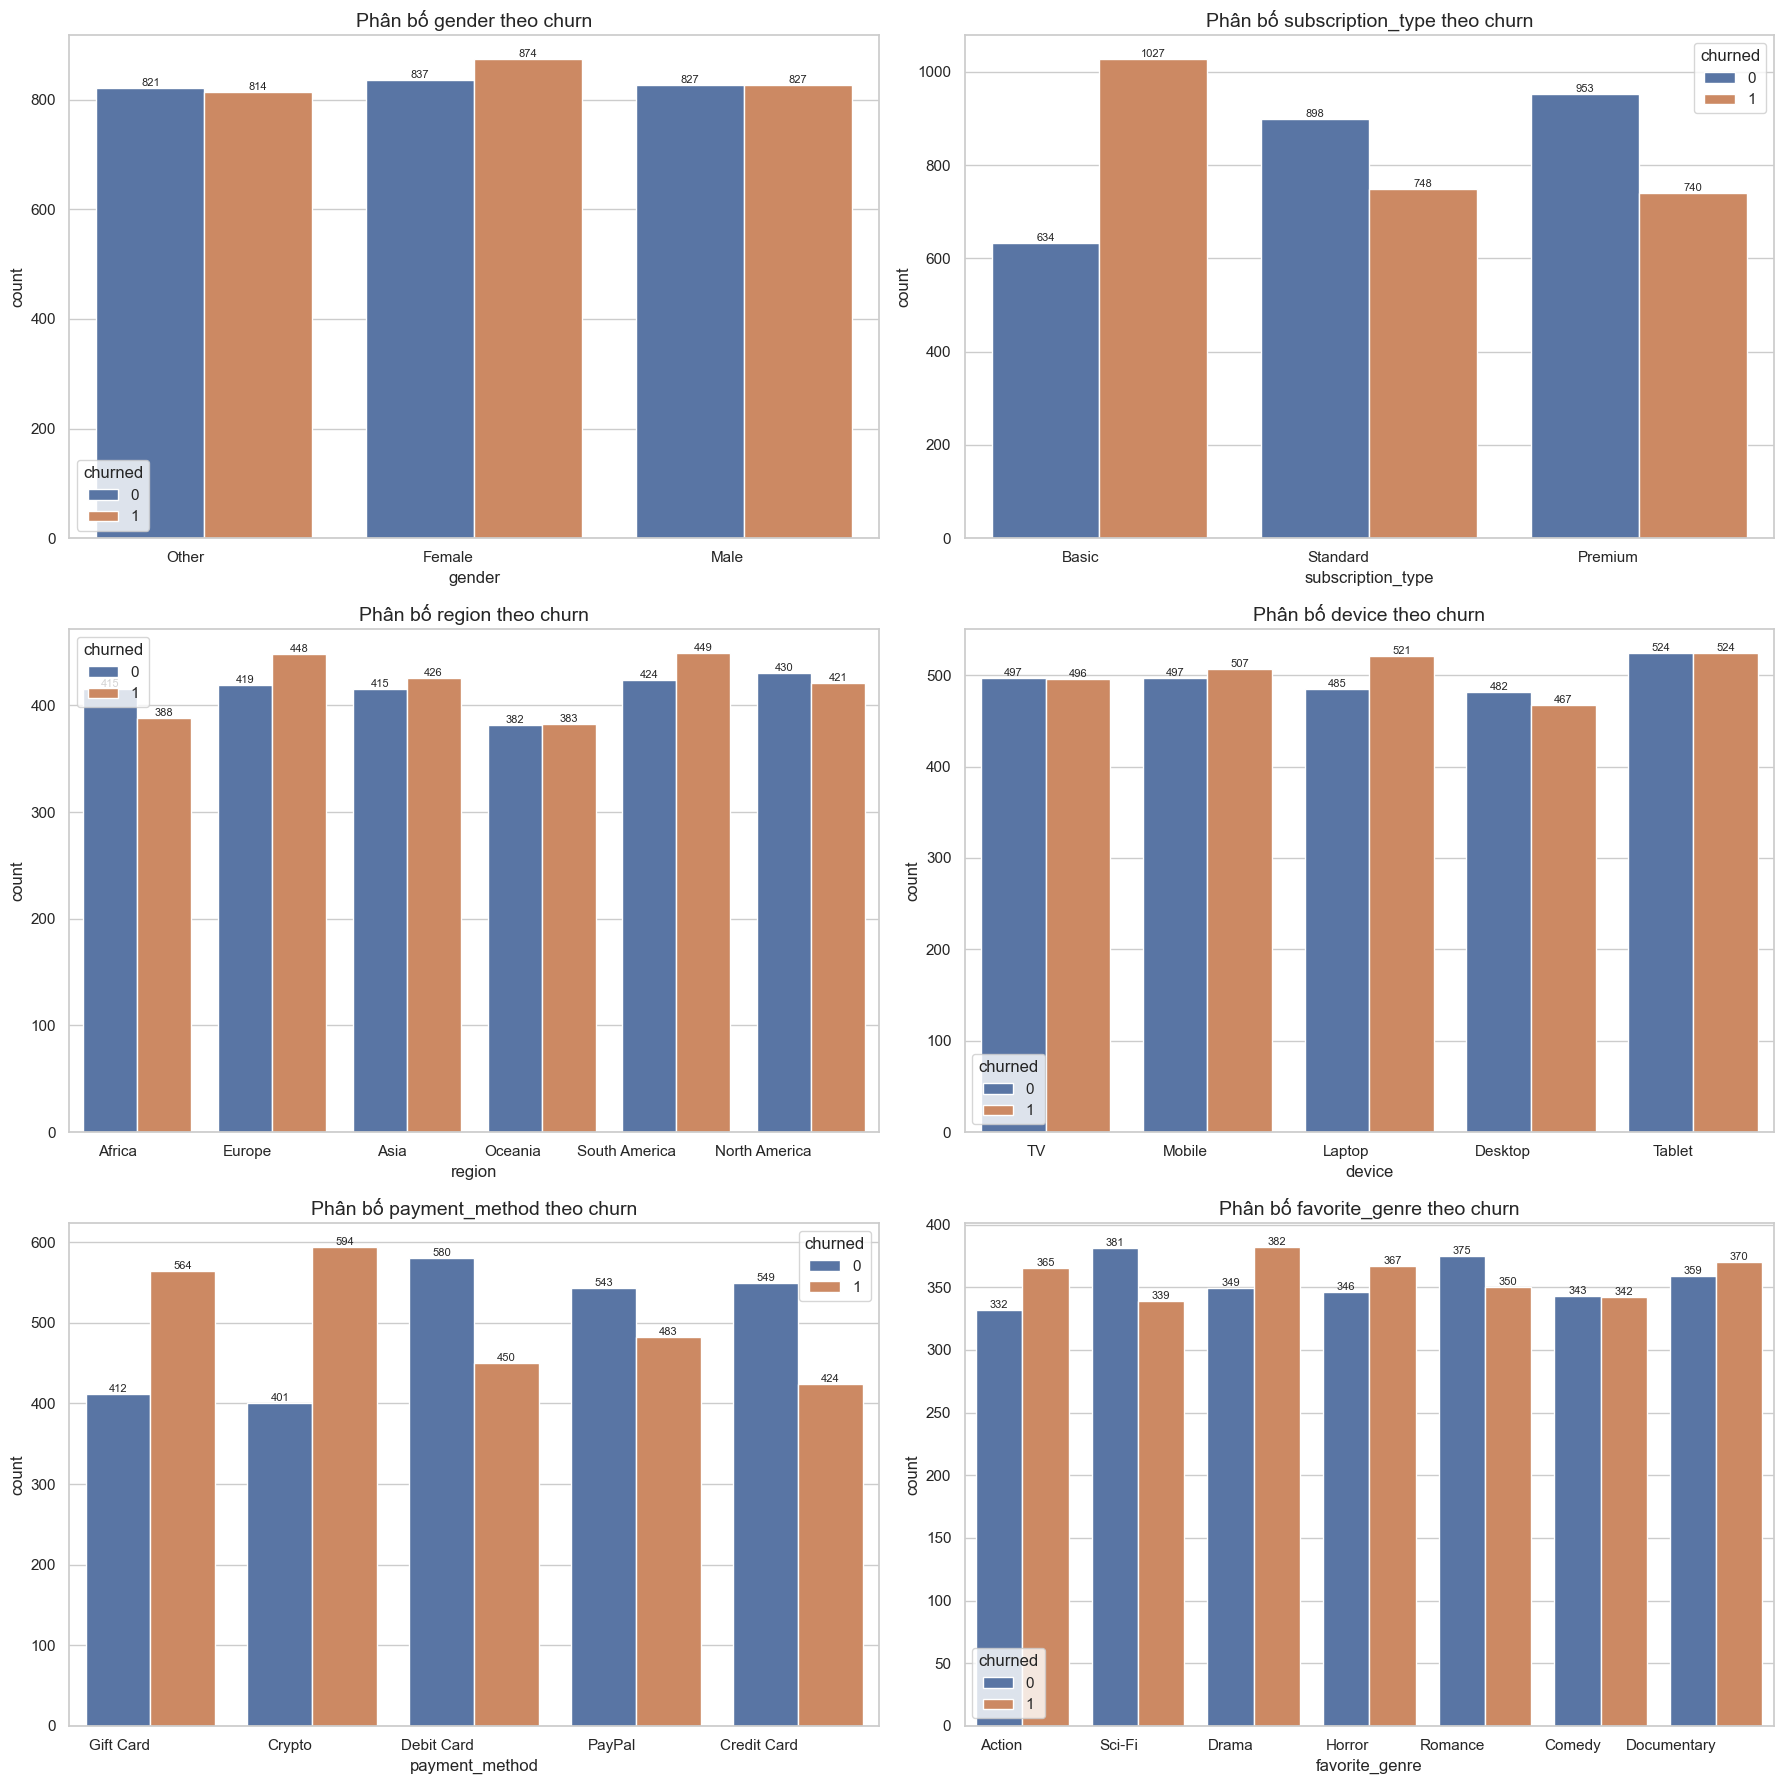

In [16]:

plt.figure(figsize=(18, 18))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    ax = sns.countplot(x=col, hue="churned", data=df)
    plt.title(f"Phân bố {col} theo churn", fontsize=14)
    plt.xticks(ha="right")
    for container in ax.containers:
        ax.bar_label(container, fontsize=8)
plt.tight_layout()
plt.show()


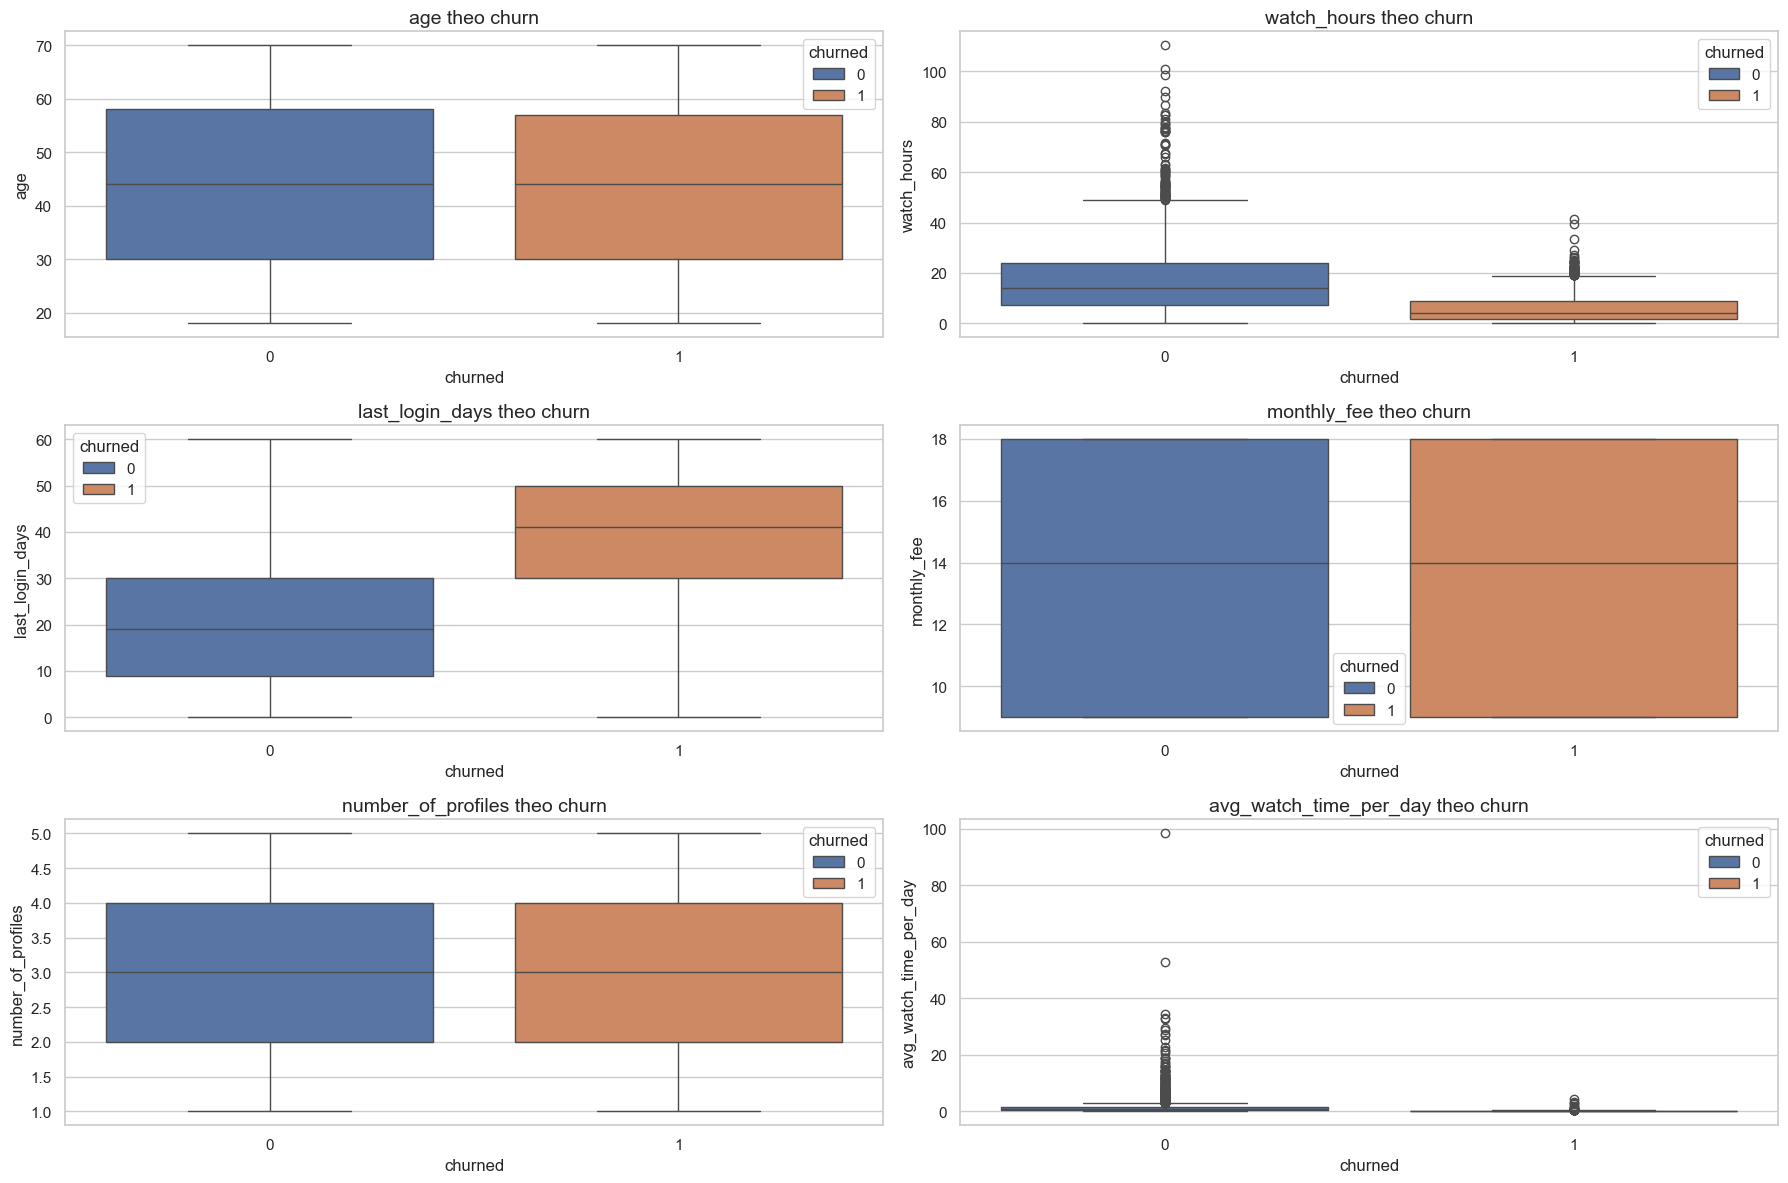

In [17]:
numeric_cols = ["age", "watch_hours", "last_login_days", "monthly_fee", "number_of_profiles", "avg_watch_time_per_day"]
# ----- 1. Boxplot cho numeric vs churn -----
plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x="churned", y=col, data=df, hue="churned")
    plt.title(f"{col} theo churn", fontsize=14)
plt.tight_layout()
plt.show()


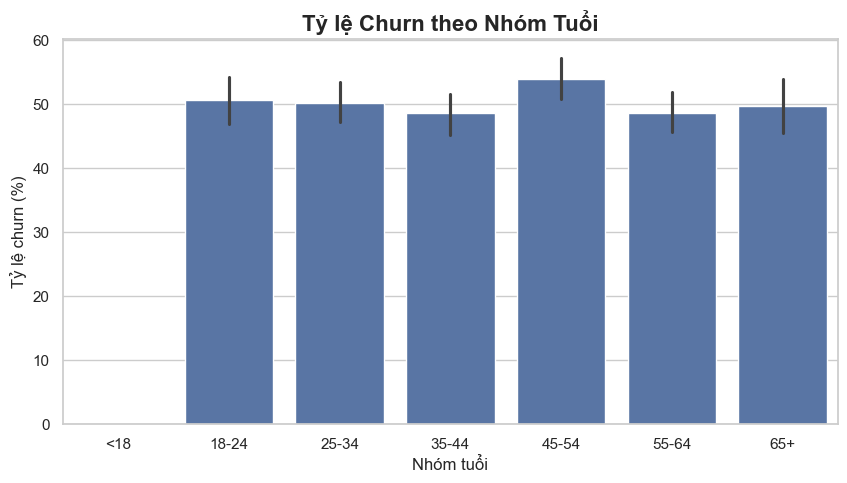

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='age_group', y='churned', estimator=lambda x: x.mean()*100)
plt.title("Tỷ lệ Churn theo Nhóm Tuổi", fontsize=16, weight='bold')
plt.ylabel("Tỷ lệ churn (%)")
plt.xlabel("Nhóm tuổi")
plt.show()

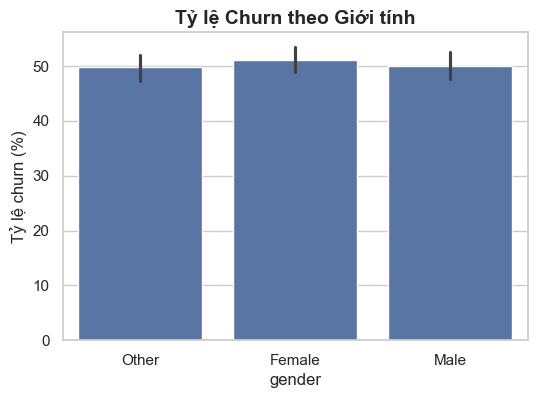

In [20]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='gender', y='churned', estimator=lambda x: x.mean()*100)
plt.title("Tỷ lệ Churn theo Giới tính", fontsize=14, weight='bold')
plt.ylabel("Tỷ lệ churn (%)")
plt.show()

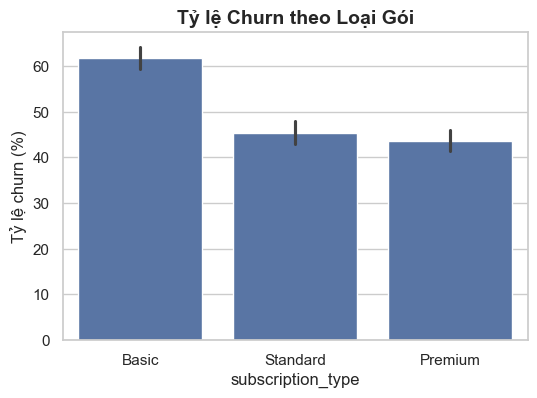

In [21]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='subscription_type', y='churned', estimator=lambda x: x.mean()*100)
plt.title("Tỷ lệ Churn theo Loại Gói", fontsize=14, weight='bold')
plt.ylabel("Tỷ lệ churn (%)")
plt.show()


C:\Users\tanh4\AppData\Local\Temp\ipykernel_3992\3896591602.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churned', y='monthly_fee', palette='coolwarm')


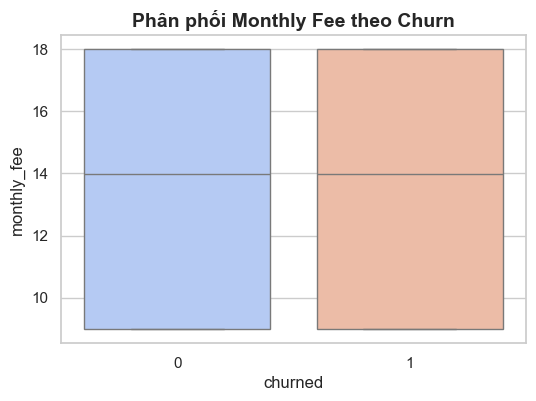

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='churned', y='monthly_fee', palette='coolwarm')
plt.title("Phân phối Monthly Fee theo Churn", fontsize=14, weight='bold')
plt.show()

C:\Users\tanh4\AppData\Local\Temp\ipykernel_3992\730723719.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='churned', y='avg_watch_time_per_day', palette='muted')


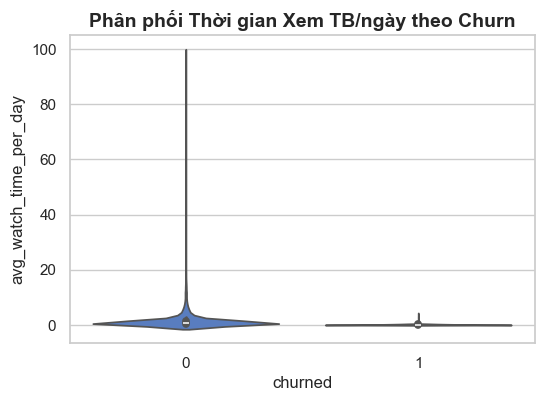

In [24]:
plt.figure(figsize=(6,4))
sns.violinplot(data=df, x='churned', y='avg_watch_time_per_day', palette='muted')
plt.title("Phân phối Thời gian Xem TB/ngày theo Churn", fontsize=14, weight='bold')
plt.show()

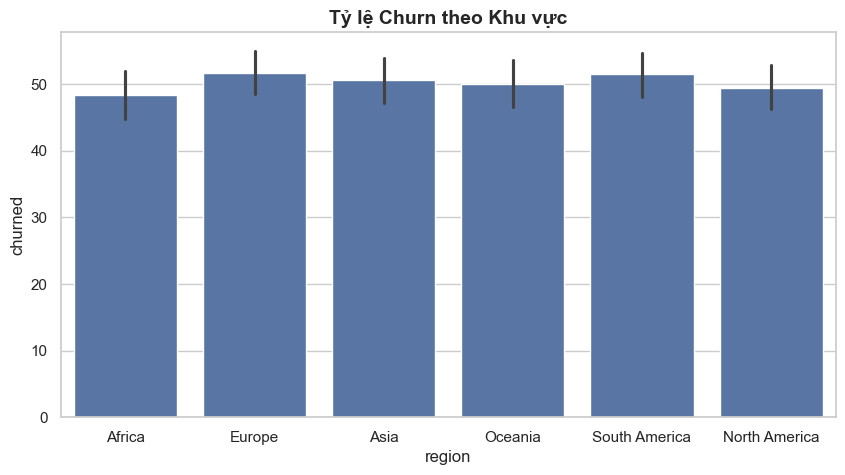

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='region', y='churned', estimator=lambda x: x.mean()*100)
plt.title("Tỷ lệ Churn theo Khu vực", fontsize=14, weight='bold')
plt.show()

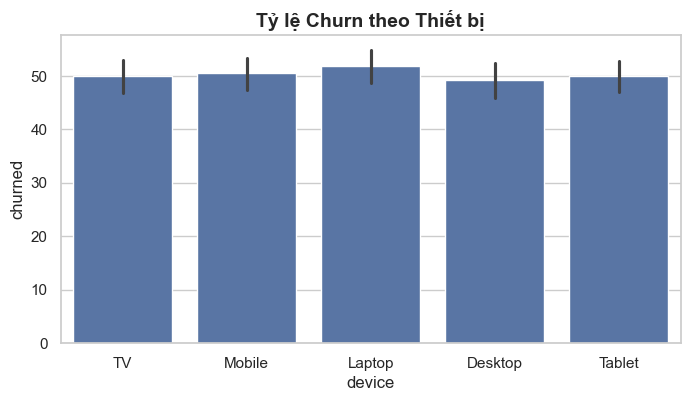

In [29]:
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='device', y='churned', estimator=lambda x: x.mean()*100)
plt.title("Tỷ lệ Churn theo Thiết bị", fontsize=14, weight='bold')
plt.show()

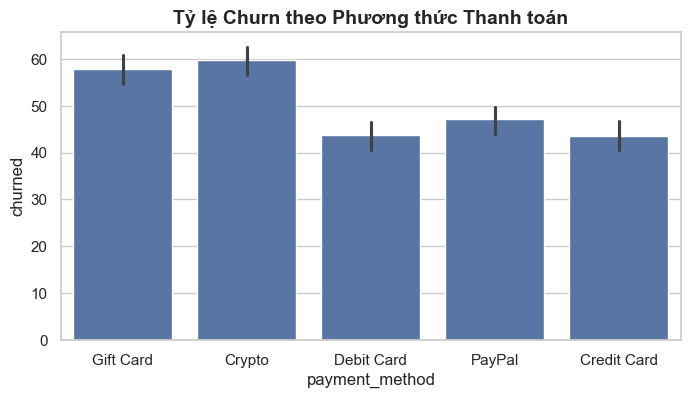

In [30]:
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='payment_method', y='churned', estimator=lambda x: x.mean()*100)
plt.title("Tỷ lệ Churn theo Phương thức Thanh toán", fontsize=14, weight='bold')
plt.show()

C:\Users\tanh4\AppData\Local\Temp\ipykernel_3992\2214638339.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churned', y='last_login_days', palette='coolwarm')


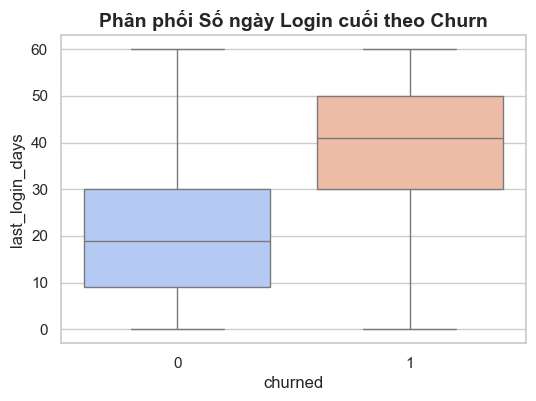

In [31]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='churned', y='last_login_days', palette='coolwarm')
plt.title("Phân phối Số ngày Login cuối theo Churn", fontsize=14, weight='bold')
plt.show()

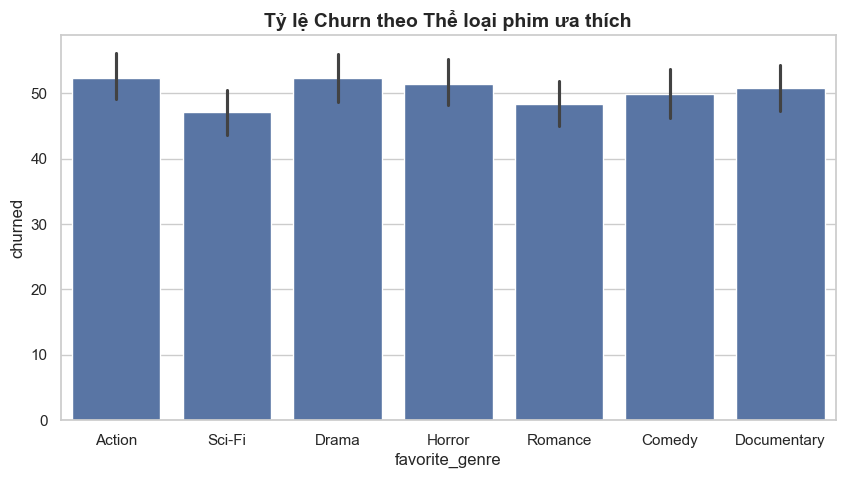

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='favorite_genre', y='churned', estimator=lambda x: x.mean()*100)
plt.title("Tỷ lệ Churn theo Thể loại phim ưa thích", fontsize=14, weight='bold')
plt.show()

In [ ]:
df.head()

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre,watch_time_bin,age_group
0,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action,"(0.0, 4.0]",45-54
1,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi,"(0.0, 4.0]",45-54
2,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama,"(0.0, 4.0]",25-34
3,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror,"(0.0, 4.0]",45-54
4,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action,"(0.0, 4.0]",55-64
